# Project: Investigate a Dataset (TMDb(THE MOVIES DATABASE))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview:
I will be using the TMDb movies dataset for Investigation
The following dataset contains the data of 10,000 movies including users ratings and revenue.It consist of columns such as imdb_id,revenue,budget,vote_count,etc,

### Questions which can be analysed are:

## Research Questions:
### 1) Movies which had most and least profit
### 2)Movies with largest and lowest budgets
### 3) Movies with most and least earned revenue
### 4)Movies with longest and shortest runtime
### 5)Average runtime of the movies
### 6) Year of release vs Profitability
### 7)Average budget of the movies
### 8)Average Revenue earned by the movies
### 9) Average duration of the movies¶

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
Importing the libraries and cleaning the dataset i.e deleting the unnecessary data whic is not in use.Thus making our calculation simpler.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tdmb_data=pd.read_csv('tmdb-movies.csv')
tdmb_data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Observation from the dataset 
Unit of curency is not mentioned in the dataset we assume it in dollars for the analysis used international currency
### Data Cleaning (Removing the unused information which is not as important in analysis)

#### Observation regarding the process:
##### 1)We need to remove unused columns
##### 2)Removing the duplicacy of the rows
##### 3)Discarding the entries which has zero or null values (its values has not been recorded)
##### 4)Changing format of budget and revenue columns
##### 5)Fixing the date column to date format
##### 6)Replacing zeros with NAN in runtime column

### 1. Removing Unused columns

Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.


In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
tdmb_data=tdmb_data.drop(del_col,1)
tdmb_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [4]:
#checking the sum of duplicated rows
sum(tdmb_data.duplicated())

1

In [5]:
#checking the rows and columns 
tdmb_data.shape

(10866, 10)

In [6]:
#Removing duplicates
tdmb_data.drop_duplicates(keep ='first', inplace=True)
tdmb_data.shape

(10865, 10)

In [7]:
tdmb_data.isnull().any()

budget            False
revenue           False
original_title    False
cast               True
director           True
tagline            True
runtime           False
genres             True
release_date      False
release_year      False
dtype: bool

In [8]:
#changing the seprate list of revenue and budget columns
list=['budget','revenue']
tdmb_data[list]=tdmb_data[list].replace(0,np.NAN)

#REMOVING ALL THE ROWS WHICH HAS NULL VALUES
tdmb_data.dropna(subset=list,inplace=True)
tdmb_data.shape

(3854, 10)

In [9]:
tdmb_data['release_date']=pd.to_datetime(tdmb_data['release_date'])
tdmb_data.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015


In [10]:
## Replacing zeros with NaN in runtime column
tdmb_data['runtime']=tdmb_data['runtime'].replace(0,np.NAN)

In [11]:
tdmb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [12]:
list1=['budget','revenue']
tdmb_data[list1]=tdmb_data[list1].applymap(np.int64)
tdmb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Movies which had most and least profit)

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#insert function with three parameters(adding columns profit earned and calculating the profit earned by subtracting budget with revenues )
tdmb_data.insert(2,'profit_earned',tdmb_data['revenue']-tdmb_data['budget'])
#the change in dataset
tdmb_data.head(4)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015


In [14]:
#1) Movies which had most and least profit
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tdmb_data[column].idxmax()
    high_details=pd.DataFrame(tdmb_data.loc[high])
    
    #for lowest earned profit
    low= tdmb_data[column].idxmin()
    low_details=pd.DataFrame(tdmb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### 2)Movies with largest and lowest budgets

In [15]:
#Movies with largest and lowest budgets
#Calling the above function
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### 3) Movies with most and least earned revenue

In [16]:
# 3)Movies with most and least earned revenue
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### 4)Movies with longest and shortest runtime

In [17]:
# 4)Movies with longest and shortest runtime
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### 5)Average runtime of the movies

In [18]:
# 5) Average runtime of the movies
tdmb_data['runtime'].mean()

109.22029060716139

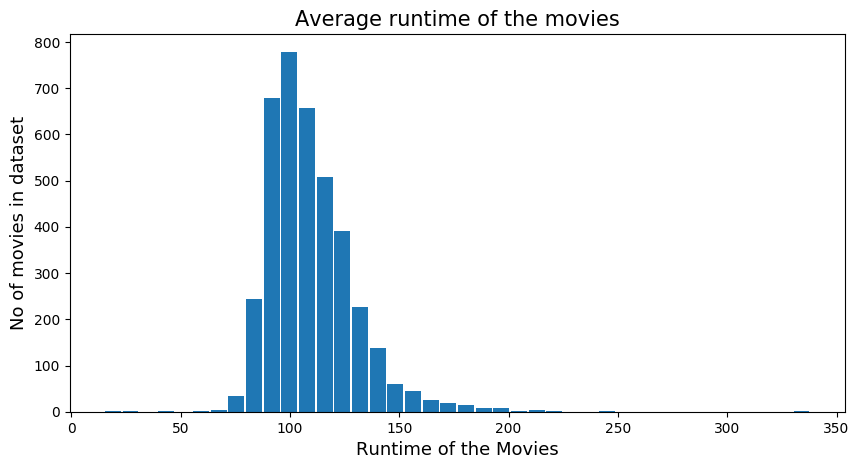

In [19]:
#plotting the histograms of the folllowing data
plt.figure(figsize=(10,5),dpi=100)
plt.xlabel('Runtime of the Movies',fontsize=13)
plt.ylabel('No of movies in dataset',fontsize=13)
plt.title('Average runtime of the movies',fontsize=15)

#plotting
plt.hist(tdmb_data['runtime'],rwidth=0.9,bins=40)
plt.show()


## Based on the above histogram we can observe that:
#### 1)THE DISTRIBUTION OF GRAPH IS SKEWED POSITIVELY OR RIGHT SKEWED
#### 2MOST OF THE RUNTIME ARE BETWEEN 80 TO 115.
#### 3)THE AVERAGE RUNTIME OF THE MOVIES ARE 109 MINUTES CAN BE CONCLUDED BY BOTH GRAPHICALLY AS WELL AS BY CALCULATIONS
#### 4)RUNTIME OF THE MOVIES DECREASES AFTER  110MINUTES CONTINUSLY WITH RESPECT TO NO. OF MOVIES

### Analysing runtime using BOX PLOT from Seaborn

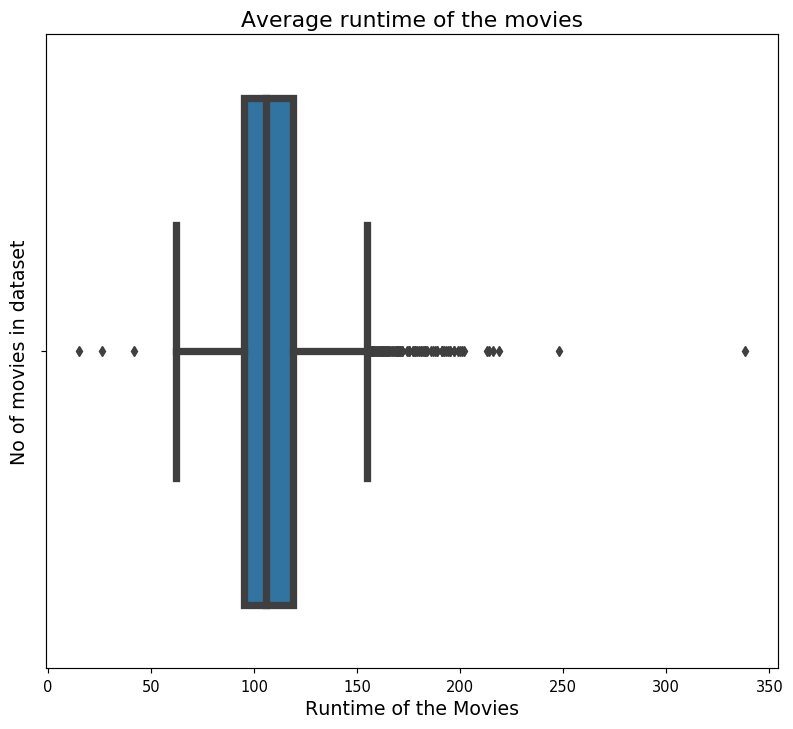

In [20]:
#Analysing runtime using BOZ PLOT
import seaborn as sns
plt.figure(figsize=(9,8),dpi=105)
#using seaborn
sns.boxplot(tdmb_data['runtime'],linewidth=5)
plt.xlabel('Runtime of the Movies',fontsize=13)
plt.ylabel('No of movies in dataset',fontsize=13)
plt.title('Average runtime of the movies',fontsize=15)

plt.show()

##  Based on the above box plot the obervations are:

### 1)MOST OF THE RUNTIME ARE BETWEEN 80 TO 115.
### 2)THE AVERAGE RUNTIME OF THE MOVIES ARE 109 MINUTES CAN BE CONCLUDED BY BOTH GRAPHICALLY AS WELL AS BY CALCULATIONS¶



### Analysing runtime using scatterplot


In [21]:
tdmb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

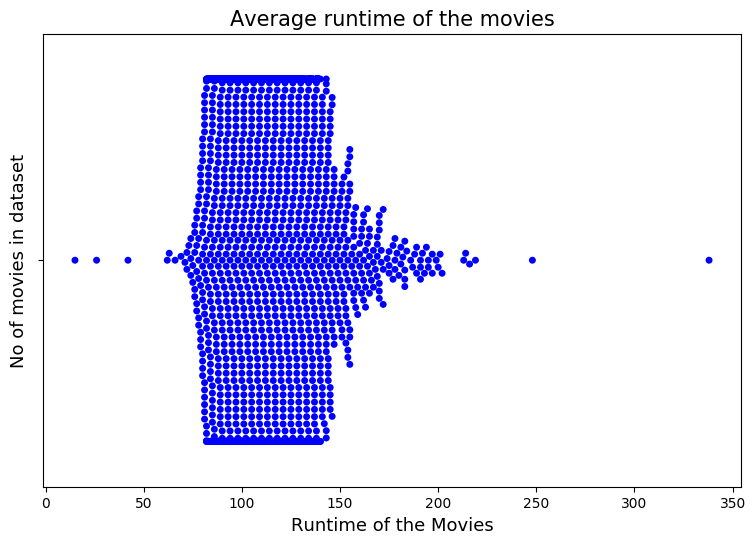

In [22]:
#Analysing runtime using datapoints plot of runtime of movies
plt.figure(figsize=(9,6),dpi=100)
sns.swarmplot(tdmb_data['runtime'],color='blue')
plt.xlabel('Runtime of the Movies',fontsize=13)
plt.ylabel('No of movies in dataset',fontsize=13)
plt.title('Average runtime of the movies',fontsize=15)
plt.show()

## Observing both the plots as well as calculations the conclusion is: 
### 1)75% of movies have runtime less than 119 minutes 
### 2)50% of movies have a runtime less than 119 minutes
### 3)25% of movies have a runtime of less than 95 minutes

### 6)Years of release vs Profit

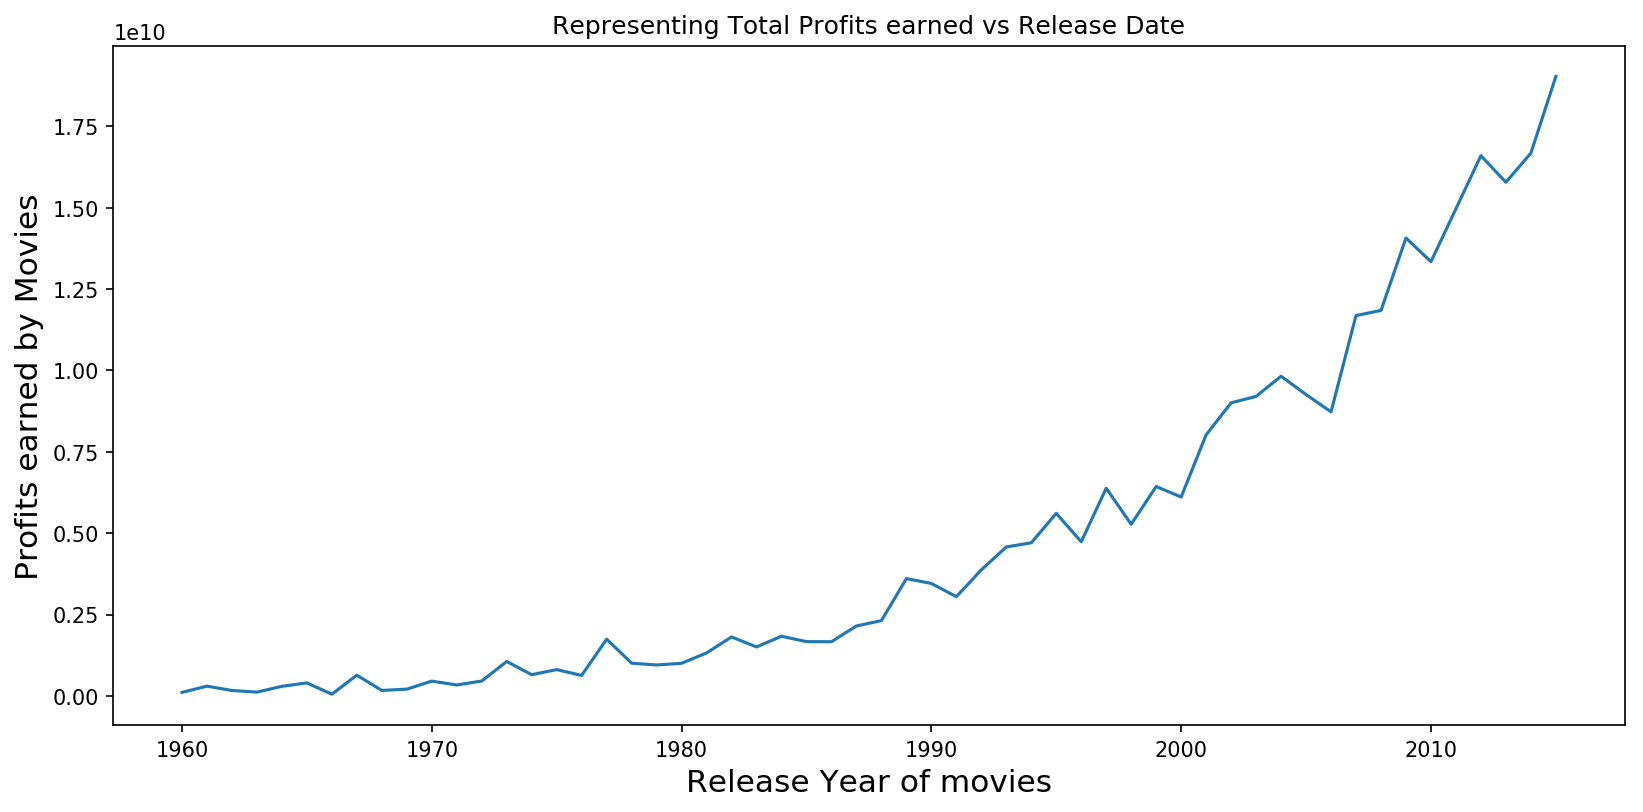

In [23]:
#we will use line plot as we have to see profit of movies for every years we have to sum up all the movies of a particular year
profit_year=tdmb_data.groupby('release_year')['profit_earned'].sum()
#PLOTTING LINE GRAPH
plt.figure(figsize=(13,6),dpi=150)
#on x-axis
plt.xlabel('Release Year of movies',fontsize=15)
plt.ylabel('Profits earned by Movies',fontsize=15)
plt.title('Representing Total Profits earned vs Release Date')
plt.plot(profit_year)
plt.show()

In [24]:
#to find the highest profit of the year
profit_year.idxmax()

2015

## Based on the above line graph we can coclude that:
#### 1)Concluding graphically as well as calculations 2015 was the year which made the most highest profit 
#### 2)Very less profit  as made in the year 1960

#### Analysing the given dataset has been done 
## With respect to the profitable movies
#### For further calculations we need to clean our dataset again.We need only the movies which have earned a significant amount of profit


In [25]:
###fixing the amount 50million dollars
profit_data=tdmb_data.query('profit_earned>=50000000')
profit_data.index=range(len(profit_data))
profit_data.index=profit_data.index+1
profit_data.head(2)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [26]:
#counting length of new movies
len(profit_data)

1338

### 7)Average Budget of the Movies

In [27]:
#function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [28]:
profit_avg('budget')

60444957.760837071

### Movies having profit 50M dollars as well as more then that  has average budget of 60 million dollars

### 8) Average Revenue earned by the movies


In [29]:
profit_avg('revenue')

254957662.59491777

###  Movies having profit 50M dollars a well as more then that has average  revenue of  255 million dollar

### 9)Average duration of the movies


In [30]:
profit_avg('runtime')

113.66741405082212

### Movies having profit 50M dollars a well as more then that has average duration of 113minutes

<a id='conclusions'></a>
## Conclusions
### This analysis for the Mvies dataset is quite intresting.We came up with some of the most intresting result after analysing dataset

### For a Movie to be in a successfull :
### 1)Average budget should be of 60million dollars
### 2)Average revenue earned should be 255million dollars
###  3)Average duration of the movies should be 113minutes
### By following the analysis the movie might be one of the hits an hence can hit average revenue of 255 million dollars

## Limitation:
### The analysis was done  considering the amount of profit of arround 50million dollars.This might be not completely errorless but yes it will defintely increase the probability  of a movie to become hit